## Aim: To classify whether a patient has chronic kidney disease or not

##Dataset Description

age - age,
bp - blood pressure,
sg - speciÞc gravity,
al - albumin,
su - sugar,
rbc - red blood cells,
pc - pus cell,
pcc - pus cell clumps,
ba - bacteria,
bgr - blood glucose random,
bu - blood urea,
sc - serum creatinine,
sod - sodium,
pot - potassium,
hemo - hemoglobin,
pcv - packed cell volume,
wc - white blood cell count,
rc - red blood cell count,
htn - hypertension,
dm - diabetes mellitus,
cad - coronary artery disease,
appet - appetite,
pe - pedal edema,
ane - anemia.

In [25]:
#IMPORT REQUIRED LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
df.shape

(400, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

We can see pcv, wc and rc column have numeric values but there dtypes is object.

In [7]:
df.pcc.unique()

array(['notpresent', 'present', nan], dtype=object)

In [8]:
df.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [11]:
df.shape

(158, 26)

In [12]:
df['pcv'] = df['pcv'].astype(float)
df['wc'] = df['wc'].astype(float)
df['rc'] = df['rc'].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              158 non-null    int64  
 1   age             158 non-null    float64
 2   bp              158 non-null    float64
 3   sg              158 non-null    float64
 4   al              158 non-null    float64
 5   su              158 non-null    float64
 6   rbc             158 non-null    object 
 7   pc              158 non-null    object 
 8   pcc             158 non-null    object 
 9   ba              158 non-null    object 
 10  bgr             158 non-null    float64
 11  bu              158 non-null    float64
 12  sc              158 non-null    float64
 13  sod             158 non-null    float64
 14  pot             158 non-null    float64
 15  hemo            158 non-null    float64
 16  pcv             158 non-null    float64
 17  wc              158 non-null    flo

In [15]:
#Convert Categorical features to numerical features using Label Encoder from sklearn

le = LabelEncoder()
for i in df.columns:
  if df[i].dtype=='object':
    df[i]=le.fit_transform(df[i])
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
9,9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,...,29.0,12100.0,3.7,1,1,0,1,0,1,0
11,11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,...,32.0,4500.0,3.8,1,1,0,1,1,0,0
14,14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,...,16.0,11000.0,2.6,1,1,1,1,1,0,0
20,20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,...,24.0,9200.0,3.2,1,1,1,1,1,1,0


<Axes: >

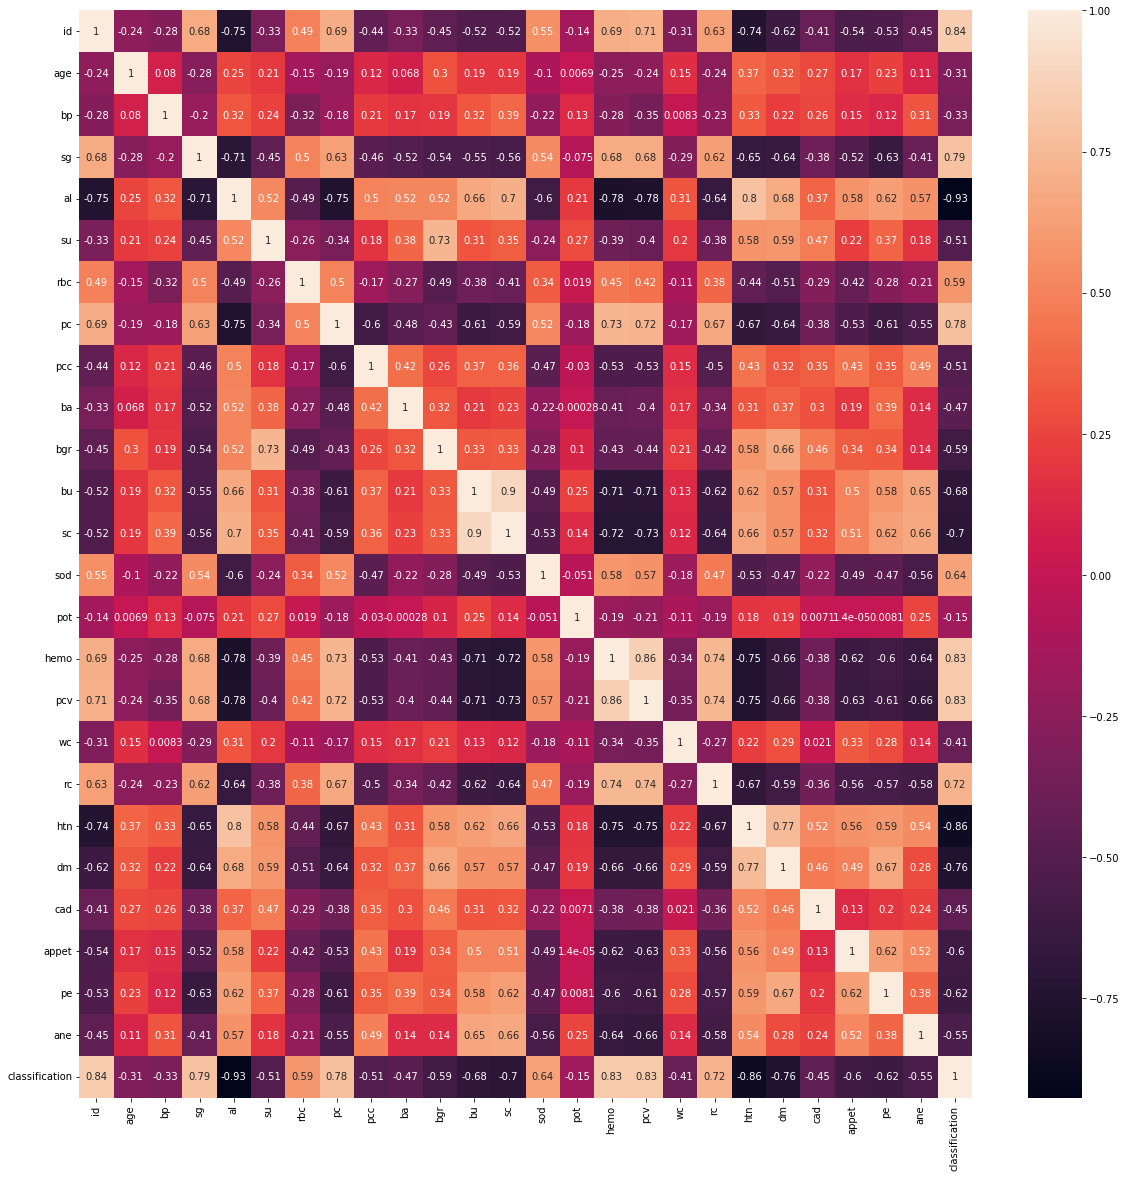

In [16]:
#Plot the correlation to see which feature will help most in the prediction

fig, ax = plt.subplots(figsize=(20,20))
correlation = df.corr()
sns.heatmap(correlation,annot=True,ax=ax)

We can see each of the 25 independent features are showing quite good correlation with the target
variable

In [18]:
#SPLIT the data into Training and Testing


X= df.drop(columns=['classification'],axis=1)
y= df['classification']
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.30,random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(110, 25)
(48, 25)
(110,)
(48,)


In [20]:
#Hyper parameter Tuning
#Perform Grid Search cross validation to find the best parameters for Decision Tree ClassiÞer


model = DecisionTreeClassifier(random_state=7)
model_params = {'criterion':['gini', 'entropy'], 
                'max_depth':range(3,25), 
                'max_features':range(4,22)}
model_cv = GridSearchCV(model,model_params,cv=5,n_jobs=-1,verbose=True)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 792 candidates, totalling 3960 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=7), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 25),
                         'max_features': range(4, 22)},
             verbose=True)

In [21]:
model_cv.best_estimator_


DecisionTreeClassifier(max_depth=3, max_features=4, random_state=7)

In [22]:
model_cv.best_score_

0.990909090909091

In [23]:
model_cv.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_features': 4}

In [24]:
y_pred=model_cv.predict(X_test)

In [26]:
# Evaluate the model

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[13  0]
 [ 0 35]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        35

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

